# Piedestały

Plik zawiera analizę wartości piedestałów z danych kalibracyjnych.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data_files = glob.glob("../Tell1CalibCsv/*.csv")

In [3]:
def module_names():
    names = []
    data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    names = data[1]
    return names

In [4]:
def join_pedestal_data():
    joined_data = pd.DataFrame()
    for file in data_files:
        data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
        data = data[data[0].str.contains("pedestal")]
        joined_data = pd.concat([joined_data, data.loc[:, 2:2049]], axis=1)
        #joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
    joined_data.index = module_names()
    joined_data.columns = range(90112)
    return joined_data

joined_pedestal_data_by_module = join_pedestal_data()
#print(joined_pedestal_data_by_module)

# Pierwsza kalibracja

- Wyświetlono, jak rozkładały się wartości piedestałów dla pierwszej kalibracji,
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Zauważono, że większość danych jest w grupie. Niektóre, po prawej stronie, jednak zdecydowanie odstają.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Nie zauważono odstających elementów. Elementy wyglądają jak losowo rozrzucone.

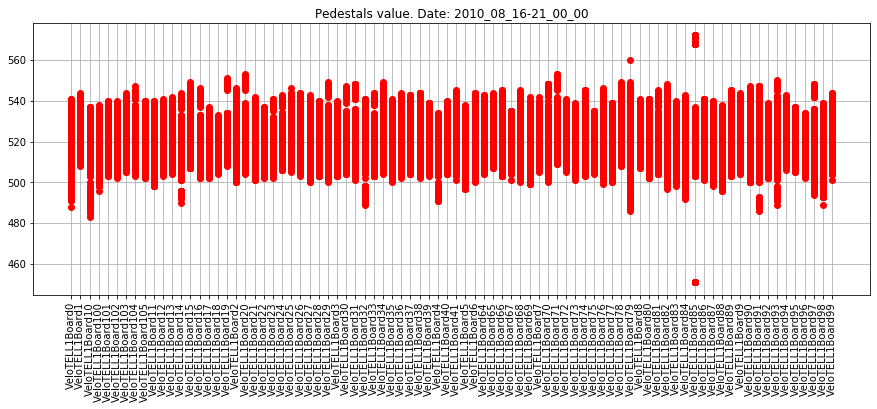

In [24]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

fig, ax = plt.subplots()
ax.set_title('Pedestals value. Date: 2010_08_16-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'ro')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

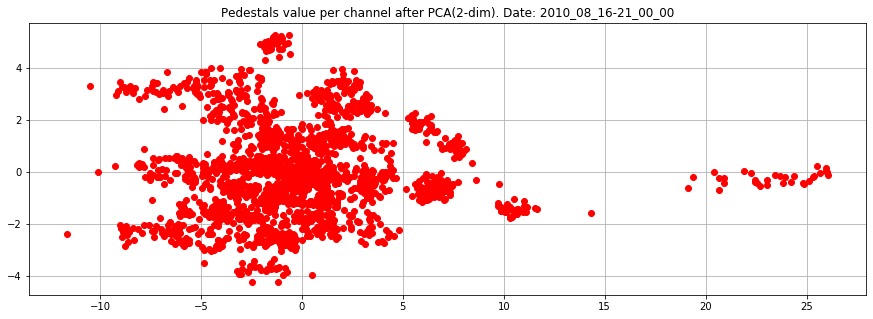

In [6]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

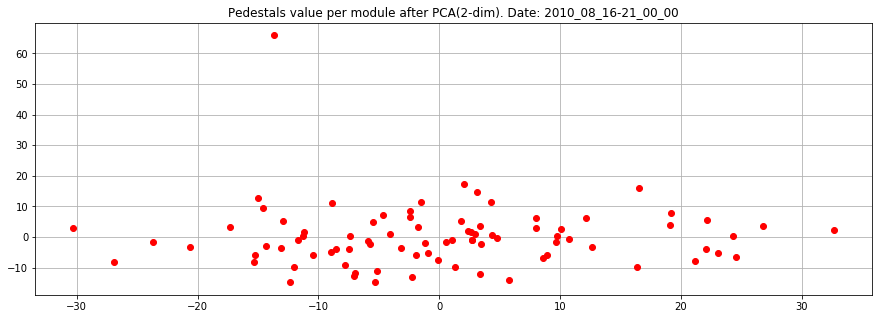

In [7]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Druga kalibracja

Zbadano również drugą kalibrację:
- Wyświetlono, jak rozkładały się wartości piedestałów dla drugiej kalibracji,
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Zauważono, że niektóre elementy odstają analogicznie jak w pierwszej kalibracji.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Nie zauważono odstających elementów. Elementy wyglądają jak losowo rozrzucone. Analogicznie jak w pierwszej kalibracji.

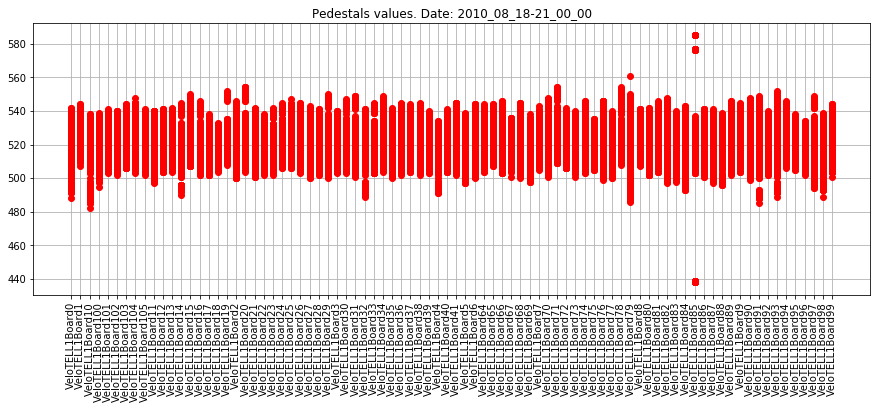

In [8]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[1] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

fig, ax = plt.subplots()
ax.set_title('Pedestals values. Date: 2010_08_18-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'ro')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

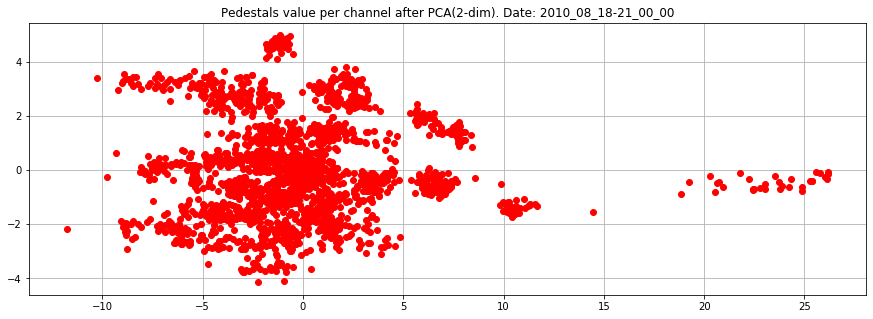

In [9]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after PCA(2-dim). Date: 2010_08_18-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

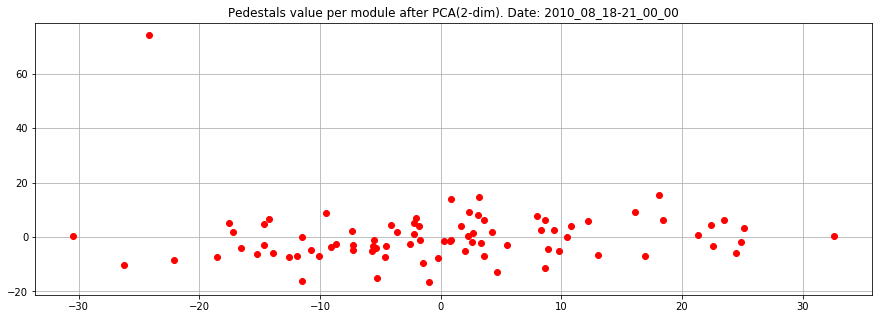

In [10]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Cała kalibracja

Złączono wszystkie dane kalibracyjne (piedestały) w jedną bazę danych i przeanalizowano:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Dla wszystkich danych również niektóre elementy odstają. W dalszej części zbadane zostanie co to za elementy.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Dla wszystkich danych dalej losowość.

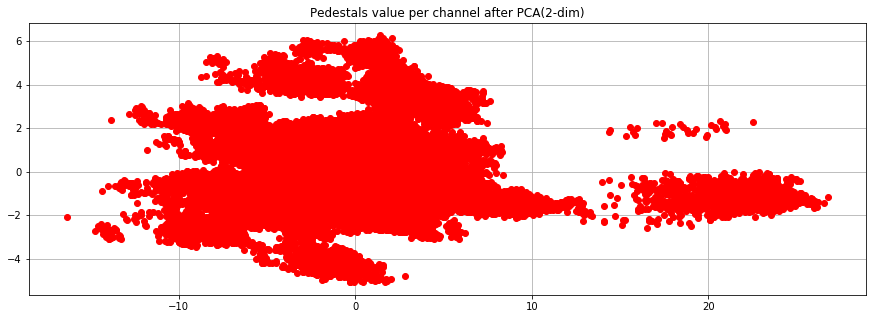

In [11]:
data_PCA = joined_pedestal_data_by_module.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

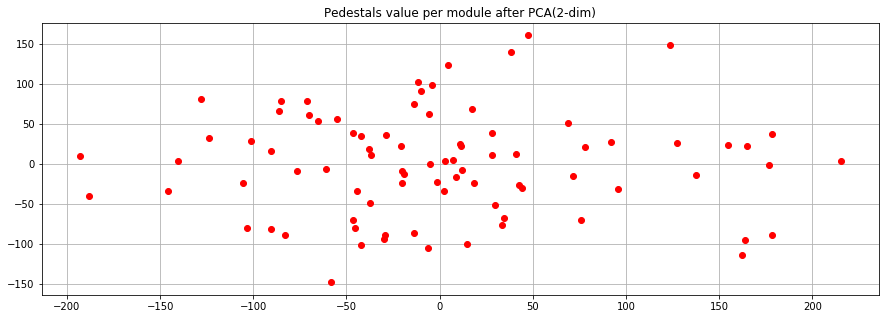

In [12]:
data_PCA = joined_pedestal_data_by_module

x = data_PCA.loc[:, range(90112)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Analiza odstających danych dla trzeciej kalibracji

Sprawdzono, które z kanałów są elementami odstającymi:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
- wyświetlono te kanały, które odstają od reszty.
  

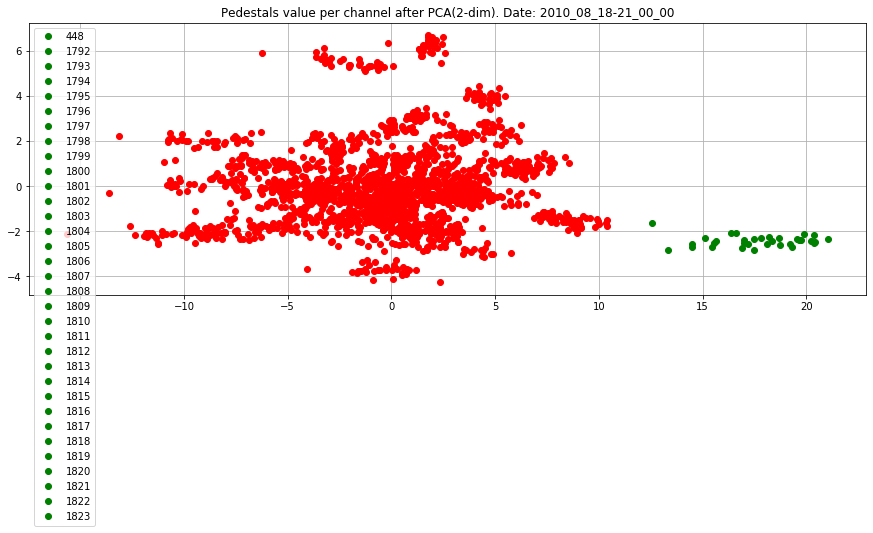

In [13]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[2] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after PCA(2-dim). Date: 2010_08_18-21_00_00')

for i in principalDf.index:
    if principalDf['pc1'][i] > 12:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go', label=i)
    else:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
ax.legend()
plt.show()


# Analiza odstających danych dla wszystkich kalibracji

Dla każdej kalibracji oddzielnie sprawdzono, które z kanałów są elementami odstającymi:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
- zbierano informacje, które z kanałów są w danej kalibracji odstającymi.

Zauważono, że te same numery kanałów są elementami odstającymi. Zliczając ilość wystąpień numerów kanałów, prawie wszystkie z nich są elementami odstającymi w każdej kalibracji (ilość wystąpień = 44). Wyjątkiem jest kanał 448, który występuje tylko 3 razy. Zebrane ilości kanałów wyświetlono pod wykresem.

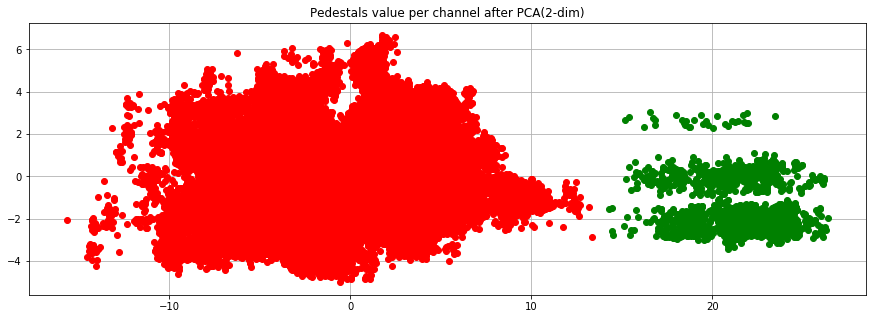

In [14]:
fig, ax = plt.subplots()
sensor_numbers_GG = []
sensor_numbers_RR = []
for file in data_files:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_PCA = data2.T

    x = data_PCA.loc[:, module_names()].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per channel after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] > 13.5:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
            sensor_numbers_GG.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbers_RR.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [15]:
print("[channel number, amount]")
for x in set(sensor_numbers_GG):
    print("[{:>14}, {:>6}]".format(x, sensor_numbers_GG.count(x)))
#print([[x,sensor_numbers.count(x)] for x in set(sensor_numbers)])

[channel number, amount]
[          1792,     43]
[          1793,     44]
[          1794,     44]
[          1795,     44]
[          1796,     44]
[          1797,     44]
[          1798,     44]
[          1799,     44]
[          1800,     44]
[          1801,     44]
[          1802,     44]
[          1803,     44]
[          1804,     44]
[          1805,     44]
[          1806,     44]
[          1807,     44]
[          1808,     44]
[          1809,     44]
[          1810,     44]
[          1811,     44]
[          1812,     44]
[          1813,     44]
[          1814,     44]
[          1815,     44]
[          1816,     44]
[          1817,     44]
[          1818,     44]
[          1819,     44]
[          1820,     44]
[          1821,     44]
[          1822,     44]
[          1823,     44]
[           448,      3]


In [28]:
snR = [[x,sensor_numbers_RR.count(x)] for x in set(sensor_numbers_RR)]
snG = [[x,sensor_numbers_GG.count(x)] for x in set(sensor_numbers_GG)]

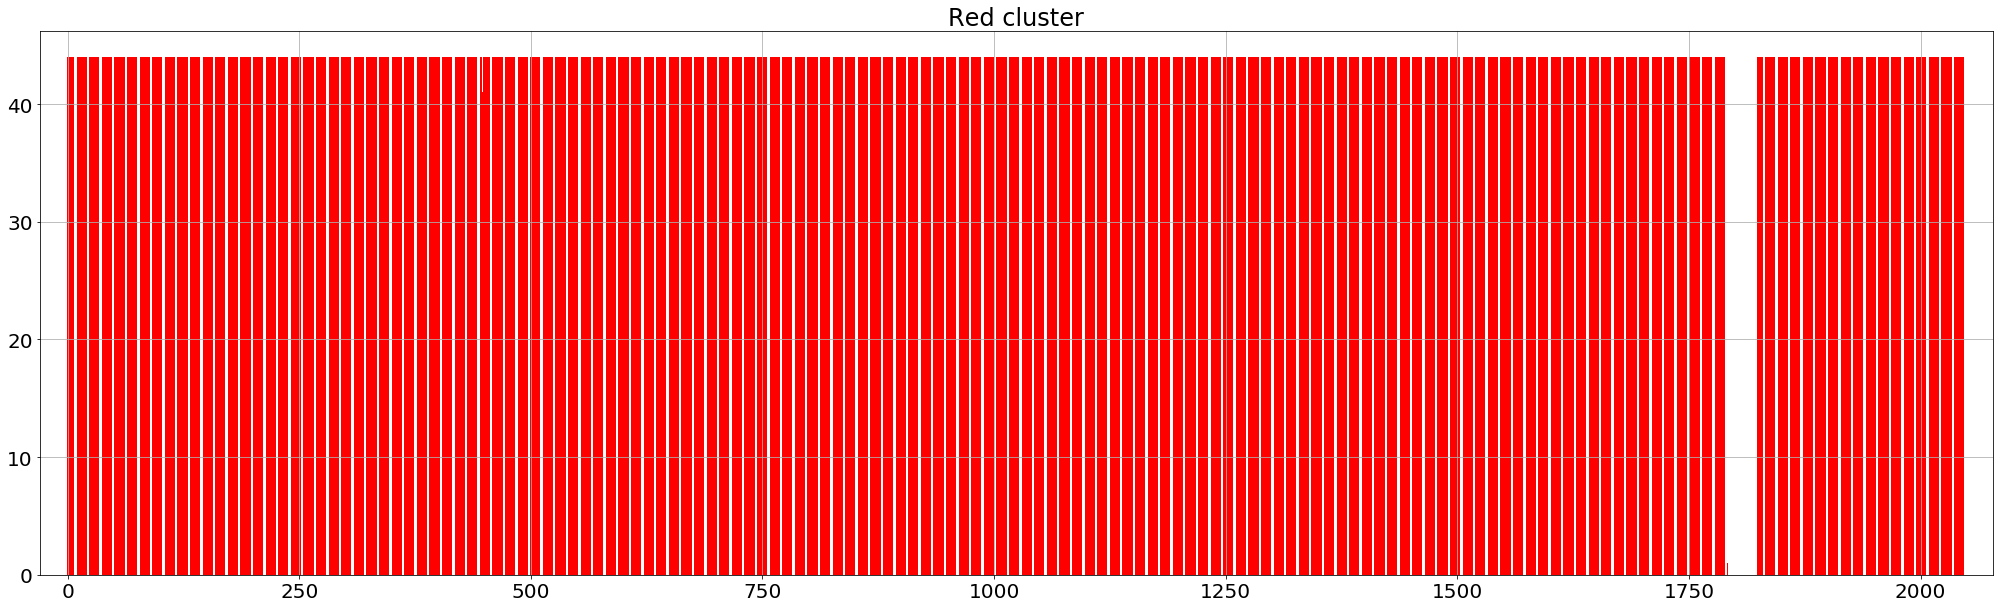

In [48]:
barData = pd.DataFrame.from_records(snR)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Red cluster')  
ax.bar(barData[0], barData[1], color='r')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

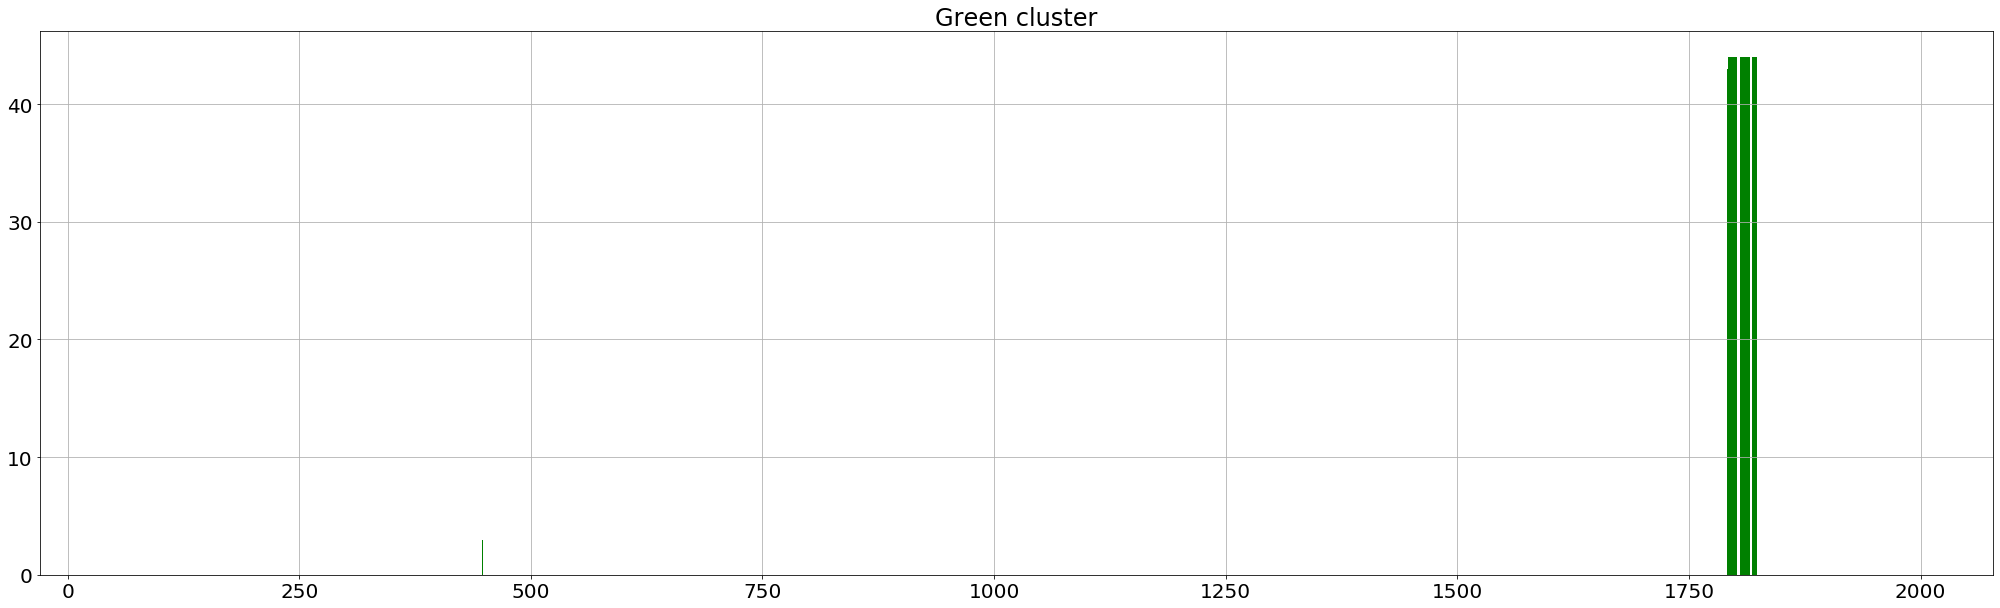

In [45]:
barData = pd.DataFrame.from_records(snG)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Green cluster')  
ax.bar(barData[0], barData[1], color='g')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

# Analiza danych dla wszystkich kalibracji w zależności od modułu

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.

Tylko nieliczne elementy odstają od grupy, reszta zawiera się w jednej grupie.

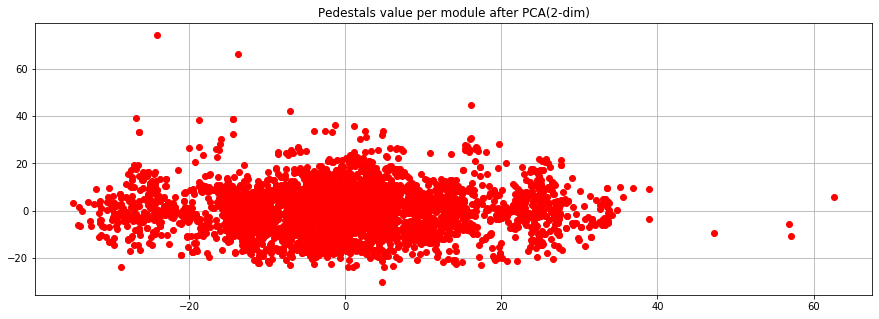

In [16]:
fig, ax = plt.subplots()
for file in data_files:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_PCA = data2

    x = data_PCA.loc[:, range(2048)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [17]:
map_data_path = "../module_mapping.csv"
map_data = pd.read_csv(map_data_path ,sep=' ', engine='python', index_col=False)
map_data_R = map_data[map_data["sensor_type"] == "R"].sort_values(by=['sensor_number'])
map_data_Phi = map_data[map_data["sensor_type"] == "phi"].sort_values(by=['sensor_number'])

r_sensors_numbers = map_data_R["sensor_number"][0:42].tolist()
phi_sensors_numbers = map_data_Phi["sensor_number"].tolist()

r_sensors_names = []
for i in r_sensors_numbers:
    r_sensors_names.append("VeloTELL1Board" + str(i))

phi_sensors_names = []
for i in phi_sensors_numbers:
    phi_sensors_names.append("VeloTELL1Board" + str(i))

# Analiza danych dla wszystkich kalibracji w zależności od kanału dla modułów typu R

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.

Po podziale na typy modułów, dla modułów typu R wyodrębniły się wyraźnie trzy grupy. Sprawdzono skład dwóch mniejszych. Wyniki wyświetlono poniżej wykresu. W skład tych grup wchodzą te same kanały co podczas analizy dla wszystkich modułów. Podzielone są mniej więcej po połowie.

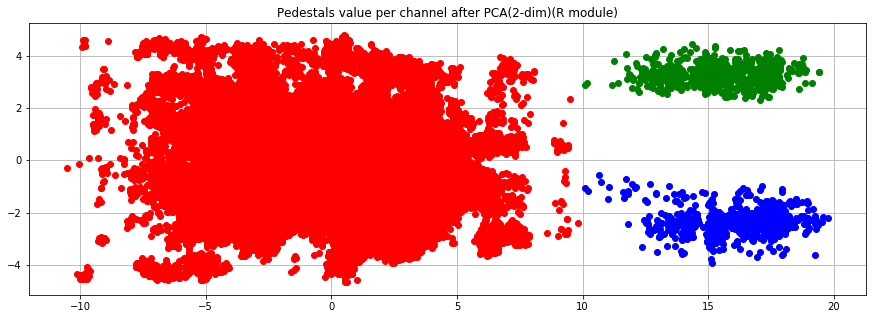

In [18]:
fig, ax = plt.subplots()
sensor_numbers_r_chanels_G = []
sensor_numbers_r_chanels_B = []
sensor_numbers_r_chanels_R = []
for file in data_files:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data = data[pd.DataFrame(data[1].tolist()).isin(r_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2049]

    data2.index = names
    data2.columns = range(2048)

    data_PCA = data2.T

    x = data_PCA.loc[:, names].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per channel after PCA(2-dim)(R module)')

    for i in principalDf.index:
        if principalDf['pc1'][i] > 10:
            if principalDf['pc2'][i] > 0:
                ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
                sensor_numbers_r_chanels_G.append(i)
            else:
                ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
                sensor_numbers_r_chanels_B.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbers_r_chanels_R.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [49]:
print("Green elements {:>25}".format("Blue elements"))
print("[channel number, amount] {:>26}".format("[channel number, amount]"))
snG = [[x,sensor_numbers_r_chanels_G.count(x)] for x in set(sensor_numbers_r_chanels_G)]
snB = [[x,sensor_numbers_r_chanels_B.count(x)] for x in set(sensor_numbers_r_chanels_B)]
snR = [[x,sensor_numbers_r_chanels_R.count(x)] for x in set(sensor_numbers_r_chanels_R)]
maxG = len(snG)
maxB = len(snB)

for i in range(maxG):
    print("[{:>14}, {:>6}]   [{:>14}, {:>6}]".format(snG[i][0], snG[i][1], snB[i][0], snB[i][1]))

Green elements             Blue elements
[channel number, amount]   [channel number, amount]
[          1792,     23]   [          1792,     20]
[          1793,     23]   [          1793,     21]
[          1794,     23]   [          1794,     21]
[          1795,     23]   [          1795,     21]
[          1796,     23]   [          1796,     21]
[          1797,     23]   [          1797,     21]
[          1798,     23]   [          1798,     21]
[          1799,     23]   [          1799,     21]
[          1800,     23]   [          1800,     21]
[          1801,     23]   [          1801,     21]
[          1802,     23]   [          1802,     21]
[          1803,     23]   [          1803,     21]
[          1804,     23]   [          1804,     21]
[          1805,     23]   [          1805,     21]
[          1806,     23]   [          1806,     21]
[          1807,     23]   [          1807,     21]
[          1808,     23]   [          1808,     21]
[          1809,     23

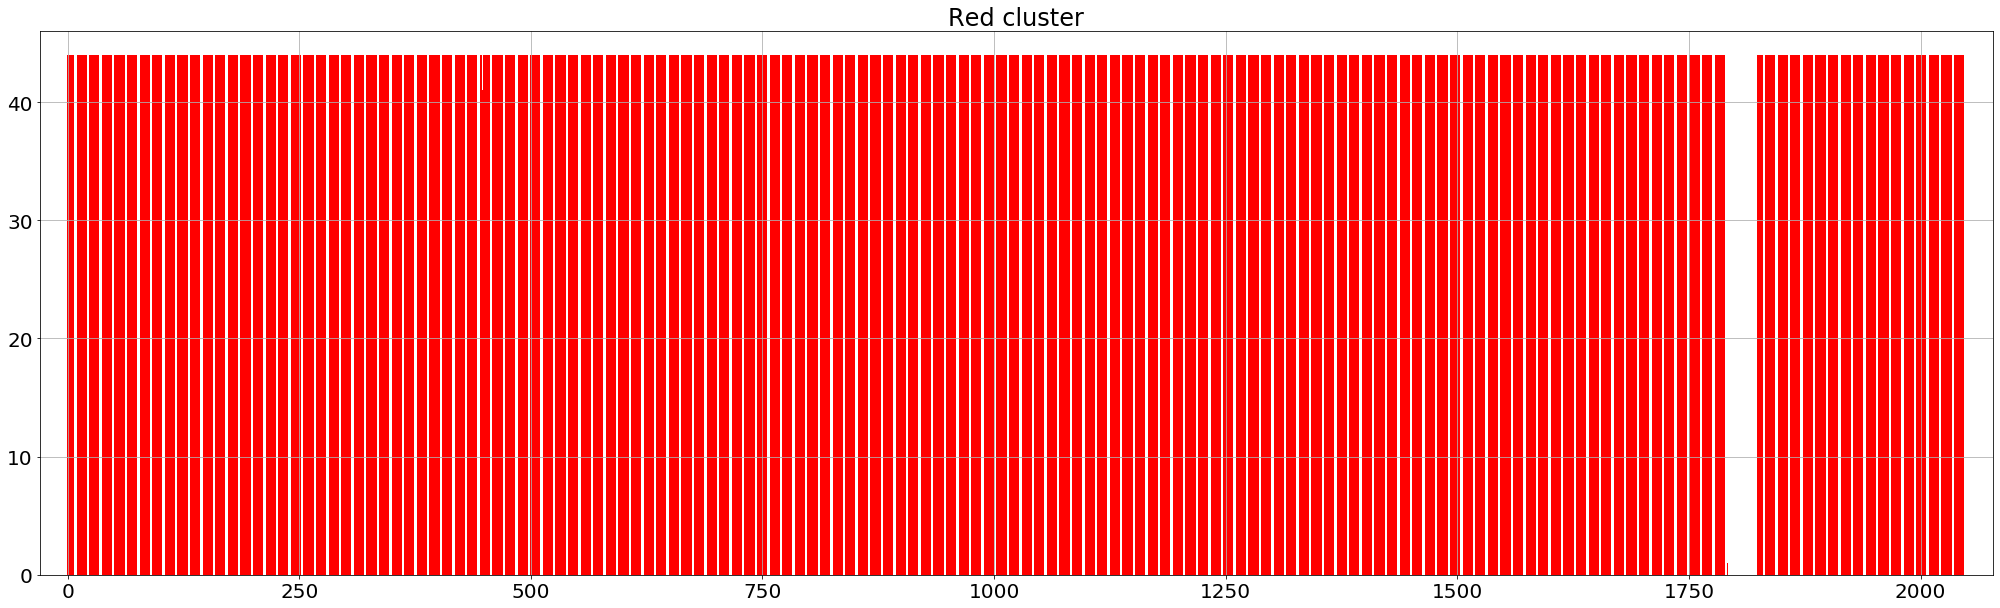

In [56]:
barData = pd.DataFrame.from_records(snR)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Red cluster')  
ax.bar(barData[0], barData[1], color='r')
ax.set_xlim([-30, 2078])
ax.set_ylim([0,   46  ])
ax.grid()

plt.show()

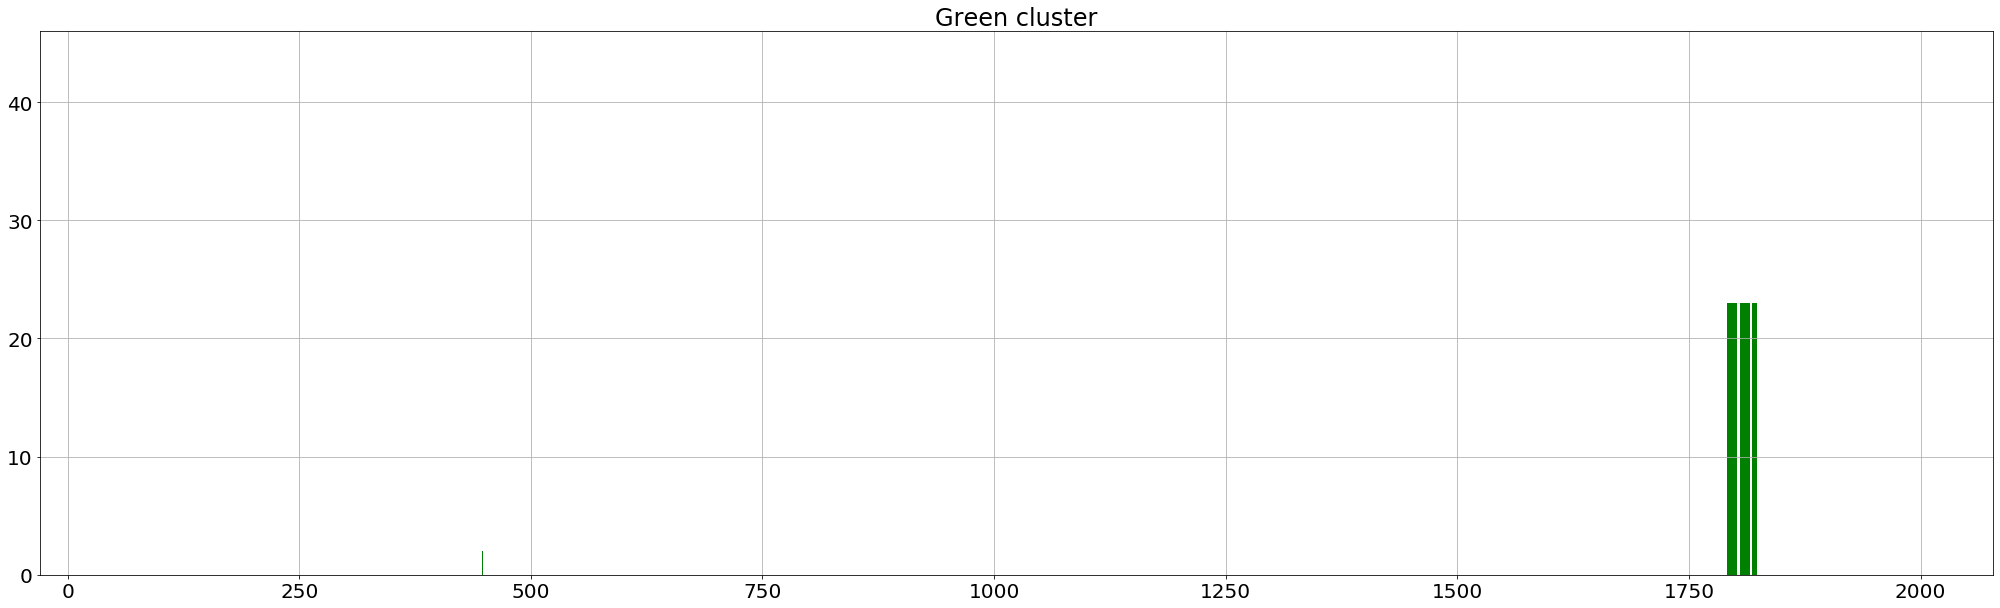

In [57]:
barData = pd.DataFrame.from_records(snG)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Green cluster')  
ax.bar(barData[0], barData[1], color='g')
ax.set_xlim([-30, 2078])
ax.set_ylim([0,   46  ])
ax.grid()

plt.show()

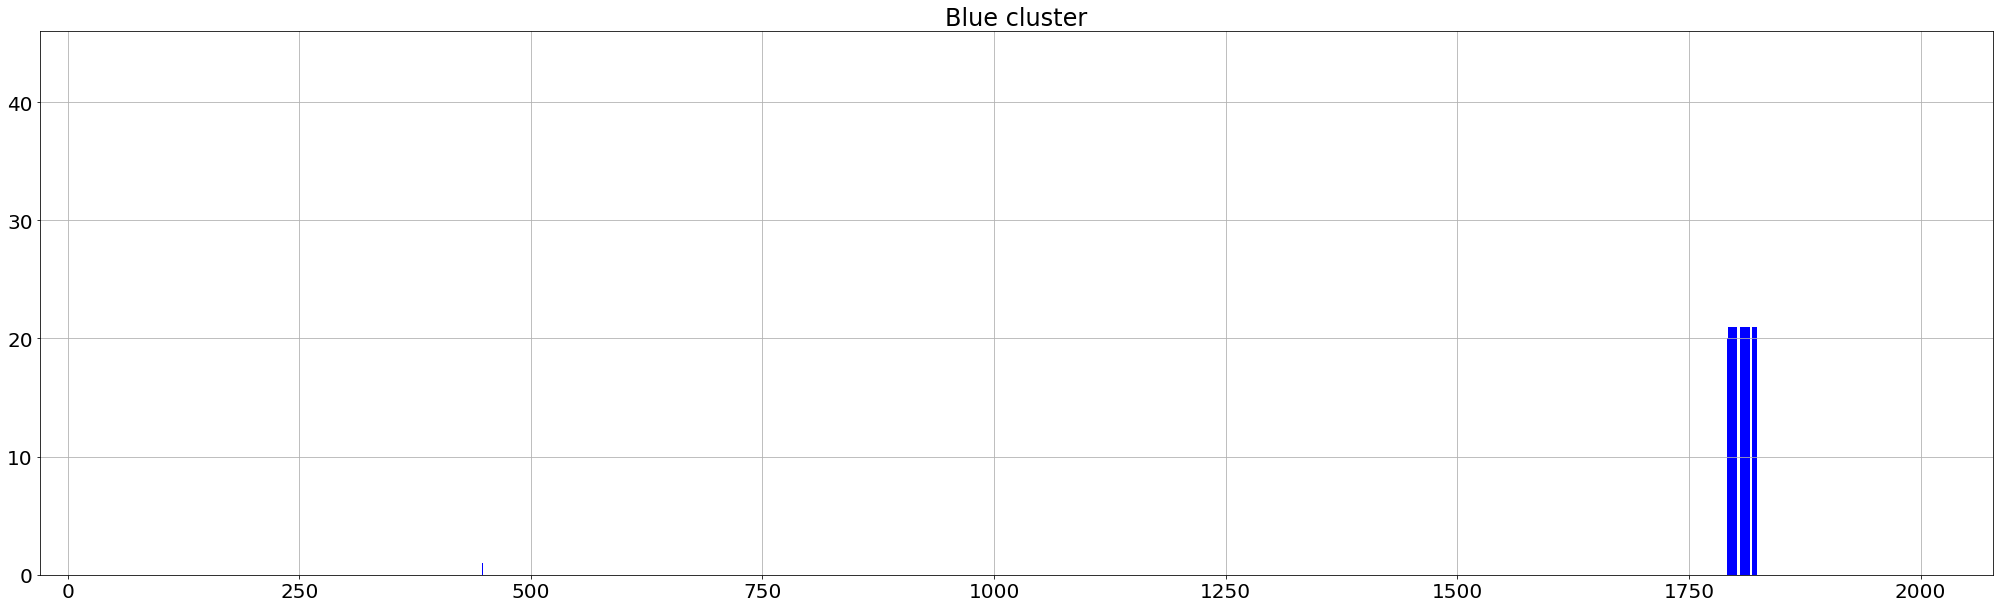

In [58]:
barData = pd.DataFrame.from_records(snB)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Blue cluster')  
ax.bar(barData[0], barData[1], color='b')
ax.set_xlim([-30, 2078])
ax.set_ylim([0,   46  ])
ax.grid()

plt.show()

# Analiza danych dla wszystkich kalibracji w zależności od kanału dla modułów typu Phi

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.

Po podziale na typy modułów, dla modułów typu Phi wyodrębniły się dwie grupy, analogicznie jak podczas analizy bez podziału na typ modułu. Sprawdzono skład mniejszej grupy. Wyniki wyświetlono poniżej wykresu. W skład tych grup wchodzą te same kanały co podczas analizy dla wszystkich modułów.

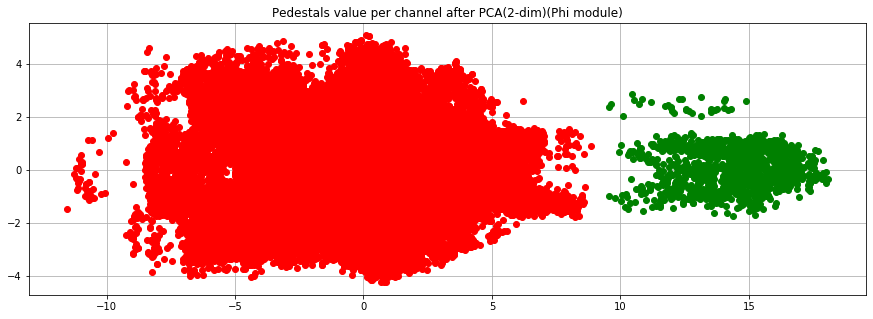

In [20]:
fig, ax = plt.subplots()
sensor_numbers_phi_chanels_GG = []
sensor_numbers_phi_chanels_RR = []
for file in data_files:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data = data[pd.DataFrame(data[1].tolist()).isin(phi_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2049]

    data2.index = names
    data2.columns = range(2048)

    data_PCA = data2.T

    x = data_PCA.loc[:, names].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per channel after PCA(2-dim)(Phi module)')

    for i in principalDf.index:
        if principalDf['pc1'][i] > 9:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
            sensor_numbers_phi_chanels_GG.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbers_phi_chanels_RR.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [63]:
print("Green elements")
print("[channel number, amount]")
snG = [[x,sensor_numbers_phi_chanels_GG.count(x)] for x in set(sensor_numbers_phi_chanels_GG)]
snR = [[x,sensor_numbers_phi_chanels_RR.count(x)] for x in set(sensor_numbers_phi_chanels_RR)]
maxG = len(snG)

for i in range(maxG):
    print("[{:>14}, {:>6}]".format(snG[i][0], snG[i][1]))

Green elements
[channel number, amount]
[          1792,     44]
[          1793,     44]
[          1794,     44]
[          1795,     44]
[          1796,     44]
[          1797,     44]
[          1798,     44]
[          1799,     44]
[          1800,     44]
[          1801,     44]
[          1802,     44]
[          1803,     44]
[          1804,     44]
[          1805,     44]
[          1806,     44]
[          1807,     44]
[          1808,     44]
[          1809,     44]
[          1810,     44]
[          1811,     44]
[          1812,     44]
[          1813,     44]
[          1814,     44]
[          1815,     44]
[          1816,     44]
[          1817,     44]
[          1818,     44]
[          1819,     44]
[          1820,     44]
[          1821,     44]
[          1822,     44]
[          1823,     44]
[           448,      3]


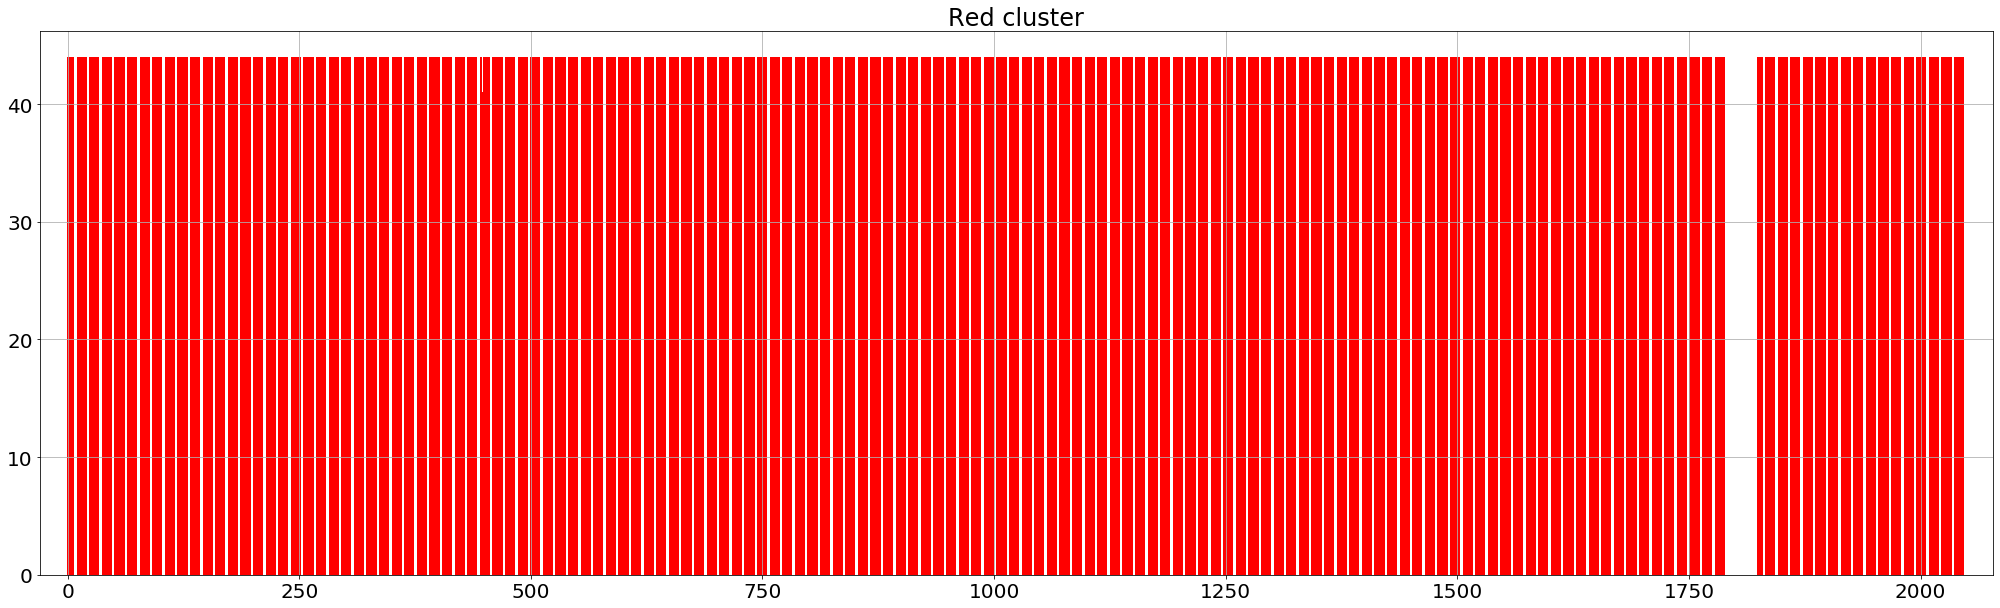

In [64]:
barData = pd.DataFrame.from_records(snR)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Red cluster')  
ax.bar(barData[0], barData[1], color='r')
ax.set_xlim([-30, 2078])
#ax.set_ylim([0,   46  ])
ax.grid()

plt.show()

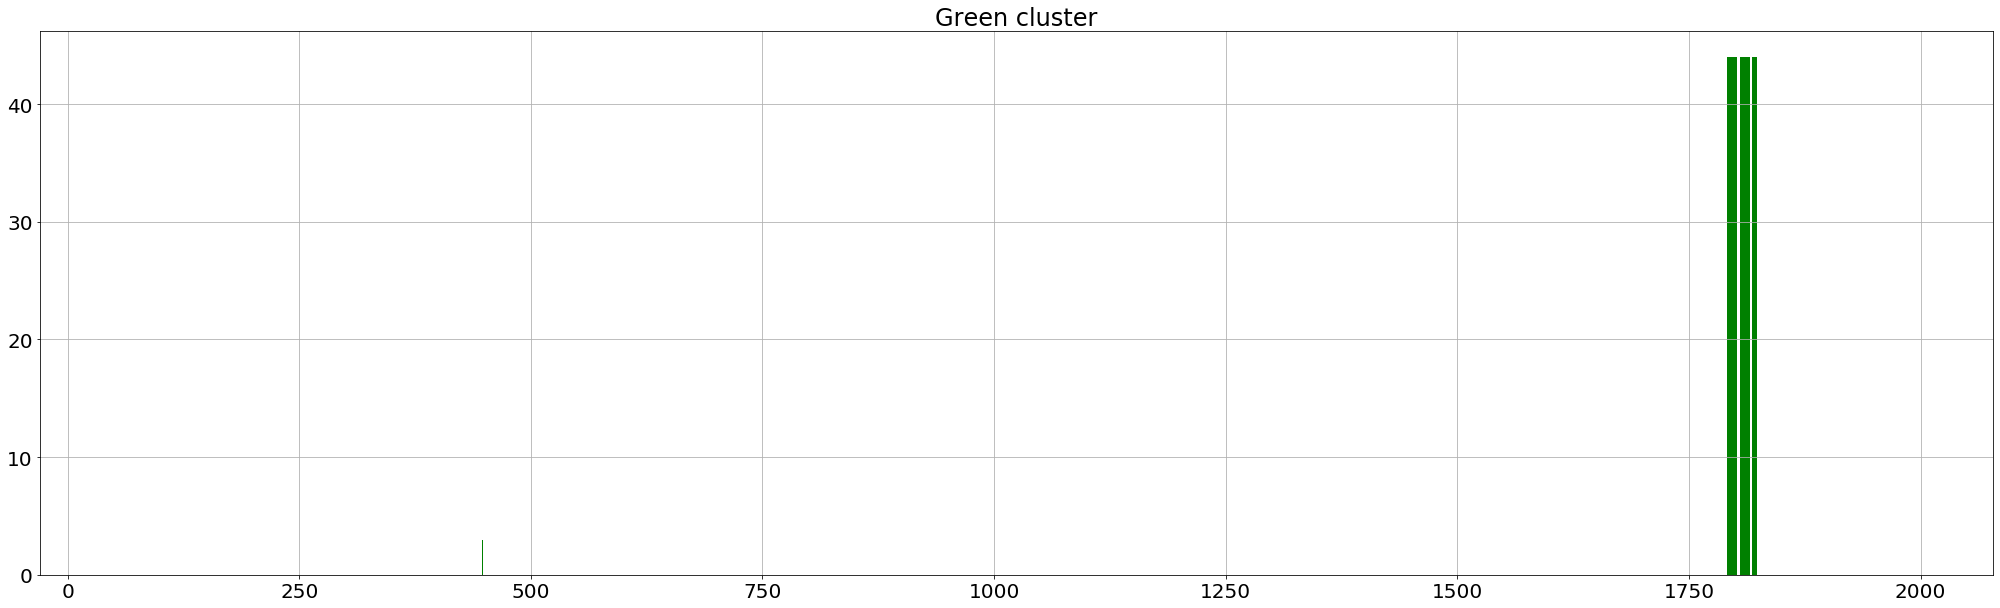

In [65]:
barData = pd.DataFrame.from_records(snG)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Green cluster')  
ax.bar(barData[0], barData[1], color='g')
ax.set_xlim([-30, 2078])
#ax.set_ylim([0,   46  ])
ax.grid()

plt.show()

# Analiza danych dla wszystkich kalibracji w zależności od modułów

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.

Po podziale na typy modułów, zarówno dla modułów typu R, jak i Phi nie zauważono podziału na żadne grupy.

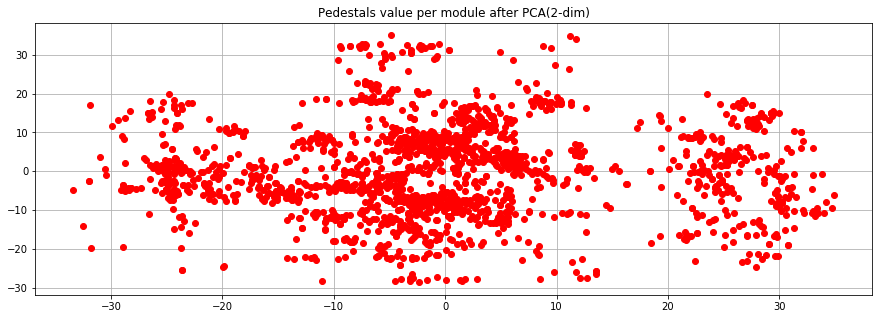

In [22]:
fig, ax = plt.subplots()
for file in data_files:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data = data[pd.DataFrame(data[1].tolist()).isin(r_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2049]

    data2.index = names
    data2.columns = range(2048)

    data_PCA = data2

    x = data_PCA.loc[:, range(2048)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

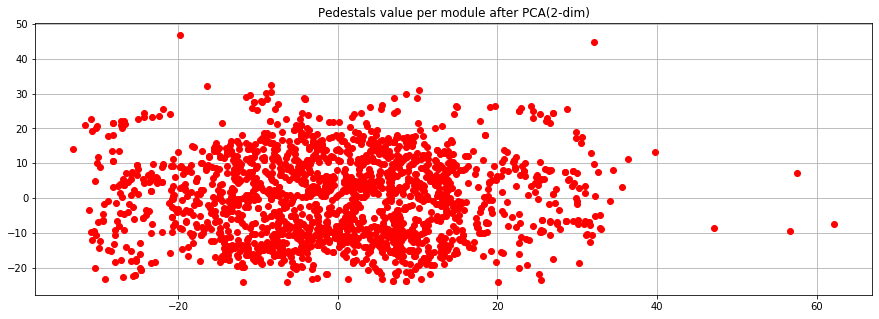

In [23]:
fig, ax = plt.subplots()
for file in data_files:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data = data[pd.DataFrame(data[1].tolist()).isin(phi_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2049]

    data2.index = names
    data2.columns = range(2048)

    data_PCA = data2

    x = data_PCA.loc[:, range(2048)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()